# Exploration Statistique - Imiter

# GRC: Segmentation d'une clientèle bancaire en Python

## Introduction
### Objectif
Ce scénatio propose  de décrire un jeu de données bancaires  en utilisant les principales méthodes de statistique exploratoire multidimensionnelle: analyse en composantes principales, analyse des correspondances simple et multiple, classification non supervisée. L'objectif principal, classqiue en marketing, est de produire une *segmentation* de clientèle, c'est-à-dire une répartition en classes homogènes des clients en fonction de leur comportement bancaire. C'est aussi la mise en oeuvre d'une démarche classique permettant d'affiner sa compréhension des données dans l'idée de construire un [score d'appétence](http://www.math.univ-toulouse.fr/~besse/Wikistat/pdf/st-scenar-app-visa.pdf) pour la carte visa premier.

### Présentation des données
#### Les variables
La liste des variables est issue d'une base de données retraçant l'historique mensuel bancaire et les caractéristiques de tous les clients. Un sondage a été réalisé afin d'alléger les traitements ainsi qu'une première sélection de variables. Les variables contenues dans le fichier initial sont décrites dans le tableau ci-dessous. Elles sont observées sur 1425 clients.

*Tableau: Liste des variables et de leur libellé* Attention, ils sont finalement écrits en majuscules dans les programmes.

**Identifiant** | **Libellé**
           --|--
`matric` | Matricule (identifiant client)
`depts` | Département de résidence
`pvs` | Point de vente
`sexeq` | Sexe (qualitatif) 
`ager` | Age en années
`famiq` | Situation familiale: `Fmar Fcel Fdiv Fuli Fsep Fveu`
`relat` | Ancienneté de relation en mois
`pcspq` | Catégorie socio-professionnelle (code num)
`quals` | Code "qualité" client évalué par la banque
`GxxGxxS` | plusieurs variables caractérisant les interdits bancaires
`impnbs` | Nombre d'impayés en cours
`rejets` | Montant total des rejets en francs
`opgnb` | Nombre d'opérations par guichet dans le mois
`moyrv` | Moyenne des mouvements nets créditeurs des 3 mois en Kf
`tavep` | Total des avoirs épargne monétaire en francs
`endet` | Taux d'endettement
`gaget` | Total des engagements en francs
`gagec` | Total des engagements court terme en francs
`gagem` | Total des engagements moyen terme en francs
`kvunb` | Nombre de comptes à vue
`qsmoy` | Moyenne des soldes moyens sur 3 mois
`qcred` | Moyenne des mouvements créditeurs en Kf
`dmvtp` | Age du dernier mouvement (en jours)\hline
`boppn` | Nombre d'opérations à M-1
`facan` | Montant facturé dans l'année en francs
`lgagt` | Engagement long terme
`vienb` | Nombre de produits contrats vie
`viemt` | Montant des produits contrats vie en francs
`uemnb` | Nombre de produits épargne monétaire
`uemmts` | Montant des produits d'épargne monétaire en francs
`xlgnb` | Nombre de produits d'épargne logement
`xlgmt` | Montant des produits d'épargne logement en francs
`ylvnb` | Nombre de comptes sur livret
`ylvmt` | Montant des comptes sur livret en francs
`nbelts` | Nombre de produits d'épargne long terme
`mtelts` | Montant des produits d'épargne long terme en francs
`nbcats` | Nombre de produits épargne à terme
`mtcats` | Montant des produits épargne à terme
`nbbecs` | Nombre de produits bons et certificats
`mtbecs` | Montant des produits bons et certificats en francs
`rocnb` | Nombre de paiements par carte bancaire à M-1
`ntcas` | Nombre total de cartes
`nptag` | Nombre de cartes point argent
`segv2s` | Segmentation version 2
`itavc` | Total des avoirs sur tous les comptes
`havef` | Total des avoirs épargne financière en francs
`jnbjd1s` | Nombre de jours à débit à M
`jnbjd2s` | Nombre de jours à débit à M-1
`jnbjd3s` | Nombre de jours à débit à M-2
**`carvp`** | **Possession de la carte VISA Premier}**


# Data Munging
## Lecture et prétraitement  des données
Les données sont disponibles dans le répertoire Drive.

Même si les données sont déjà extraites par échantillonnage d'une très grande base, elles nécessitent un travail prémiminaire (*data munging*) pour détecter, corriger les erreurs et incohérences, éliminer des redondances, traiter les données manquantes, transformer certaines variables.  Ce travail préliminaire, souvent long et fastidieux, nécessite d'y consacer beaucoup de temps et de rigueur afin de s'assurer de la qualité finale des résultats. 


### Lecture des données

In [40]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

In [41]:
#Lecture
listeVar=['MATRIC','DEPTS','PVS','SEXEQ','AGER','FAMIQ', 
 'RELAT','PCSPQ','QUALS','G03G04S','G25G26S', 
 'G29G30S','G35G36S','G37G38S','G45G46S','G47G48S',
 'IMPNBS','REJETS','OPGNB','MOYRV','TAVEP','ENDET','GAGET',
 'GAGEC','GAGEM','KVUNB','QSMOY','QCRED','DMVTP','BOPPN',
 'FACAN','LGAGT','VIENB','VIEMT','UEMNB','UEMMTS','XLGNB',
 'XLGMT','YLVNB','YLVMT','NBELTS','MTELTS','NBCATS','MTCATS',
 'NBBECS','MTBECS','ZOCNB','NTCAS','NPTAG','SEGV2S','ITAVC',
 'HAVEF','JNBJD1S','JNBJD2S','JNBJD3S','CARVP']
path=""
visaraw = pd.read_table(path+'visa_raw.dat',
                        sep=';',header=None, index_col=0, names=listeVar)
visaraw.head()

,DEPTS,PVS,SEXEQ,AGER,FAMIQ,RELAT,PCSPQ,QUALS,G03G04S,G25G26S,...,ZOCNB,NTCAS,NPTAG,SEGV2S,ITAVC,HAVEF,JNBJD1S,JNBJD2S,JNBJD3S,CARVP
MATRIC,,,,,,,,,,,,,,,,,,,,,
131842,31,03,1,67,M,406,755,A,inc,inc,...,0,2,0,5,947984,614107,0,0,1,oui
140210,31,01,1,82,M,445,770,A,inc,inc,...,33,2,0,5,3368558,2569775,3,3,5,oui
148009,31,01,1,51,M,238,311,A,inc,inc,...,14,2,0,inc,1303700,556967,0,0,1,oui
442153,82,06,1,52,M,270,465,A,inc,inc,...,5,2,0,5,19856243,133896,0,0,0,oui
552427,97,01,1,58,M,139,345,C,inc,inc,...,0,1,0,1,122745,0,0,0,0,oui


Une fonction permet de définir le bon type "categorical" des variables qualitatives  en utilisant un dictionnaire des modalités pour le recodage.

In [42]:
def create_categorical_data(df,column_name, cat_name_dic):
    cat_columns = pd.Categorical(df[column_name],ordered=False)
    new_categorie = [cat_name_dic[old_name] for old_name in cat_columns.categories]
    return cat_columns.rename_categories(new_categorie)

In [43]:
#FAMIQ
cat_name_dic = {'C':'Fcel','D':'Fdiv','M':'Fmar','S':'Fsep','U':'Fuli','V':'Fveu','inc':'Finc'}
visaraw["FAMIQ"]=create_categorical_data(visaraw,"FAMIQ", cat_name_dic)
#SEXEQ
cat_name_dic = {'1':'Shom','2':'Sfem','inc':'Sinc'}
visaraw["SEXEQ"]=create_categorical_data(visaraw,"SEXEQ", cat_name_dic)
#CARVP
cat_name_dic = {'non':'Cnon','oui':'Coui'}
visaraw["CARVP"]=create_categorical_data(visaraw,"CARVP", cat_name_dic)
#PCSPQ
visaraw["PCSPQ"] = visaraw["PCSPQ"].str.get(0).replace("0","i")
cat_name_dic = {'1':'Pagr', '2':'Part', '3':'Pcad', '4':'Pint', '5':'Pemp','6':'Pouv',
                '7':'Pret', '8':'Psan', 'i':'Pinc'}
visaraw["PCSPQ"]=create_categorical_data(visaraw,"PCSPQ", cat_name_dic)

####  Premiers nettoyages
Suppression d'observations non pertinentes:interdits bancaires et comptes professionnels.

In [44]:
visaraw = visaraw[visaraw.NBCATS!= "1"]
visaraw = visaraw[visaraw.NBBECS!= "1"]

visaraw= visaraw[np.logical_not(visaraw.G29G30S.isin(['B','X']))] 
visaraw= visaraw[np.logical_not(visaraw.G03G04S.isin(['B','X']))] 
visaraw= visaraw[np.logical_not(visaraw.G45G46S.isin(['A','B','X']))] 
visaraw= visaraw[np.logical_not(visaraw.G37G38S.isin(['A']))] 
visaraw= visaraw[np.logical_not(visaraw.G25G26S.isin(['A','B','X']))] 
visaraw= visaraw[np.logical_not(visaraw.G47G48S.isin(['B']))] 
visaraw.head()

,DEPTS,PVS,SEXEQ,AGER,FAMIQ,RELAT,PCSPQ,QUALS,G03G04S,G25G26S,...,ZOCNB,NTCAS,NPTAG,SEGV2S,ITAVC,HAVEF,JNBJD1S,JNBJD2S,JNBJD3S,CARVP
MATRIC,,,,,,,,,,,,,,,,,,,,,
131842,31,03,Shom,67,Fmar,406,Pret,A,inc,inc,...,0,2,0,5,947984,614107,0,0,1,Coui
140210,31,01,Shom,82,Fmar,445,Pret,A,inc,inc,...,33,2,0,5,3368558,2569775,3,3,5,Coui
148009,31,01,Shom,51,Fmar,238,Pcad,A,inc,inc,...,14,2,0,inc,1303700,556967,0,0,1,Coui
552427,97,01,Shom,58,Fmar,139,Pcad,C,inc,inc,...,0,1,0,1,122745,0,0,0,0,Coui
556005,40,01,Shom,27,Fcel,99,Psan,B,inc,inc,...,14,2,0,5,83224,0,0,0,0,Coui


In [45]:
visaraw.describe(include='all')

,DEPTS,PVS,SEXEQ,AGER,FAMIQ,RELAT,PCSPQ,QUALS,G03G04S,G25G26S,...,ZOCNB,NTCAS,NPTAG,SEGV2S,ITAVC,HAVEF,JNBJD1S,JNBJD2S,JNBJD3S,CARVP
count,1290,1290,1290,1290,1290,1290,1290,1290,1290,1290,...,1290,1290,1290,1290,1290,1290,1290,1290,1290,1290
unique,36,8,3,90,7,377,9,7,2,1,...,57,7,5,8,1172,346,41,36,38,2
top,31,01,Shom,42,Fmar,.,Pemp,B,inc,inc,...,.,1,0,6,0,0,0,0,0,Cnon
freq,806,821,772,36,662,29,286,348,1285,1290,...,422,576,1115,313,70,825,916,897,898,879


In [46]:
visaraw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1290 entries, 131842 to 7589439
Data columns (total 55 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   DEPTS    1290 non-null   object  
 1   PVS      1290 non-null   object  
 2   SEXEQ    1290 non-null   category
 3   AGER     1290 non-null   object  
 4   FAMIQ    1290 non-null   category
 5   RELAT    1290 non-null   object  
 6   PCSPQ    1290 non-null   category
 7   QUALS    1290 non-null   object  
 8   G03G04S  1290 non-null   object  
 9   G25G26S  1290 non-null   object  
 10  G29G30S  1290 non-null   object  
 11  G35G36S  1290 non-null   object  
 12  G37G38S  1290 non-null   object  
 13  G45G46S  1290 non-null   object  
 14  G47G48S  1290 non-null   object  
 15  IMPNBS   1290 non-null   object  
 16  REJETS   1290 non-null   object  
 17  OPGNB    1290 non-null   object  
 18  MOYRV    1290 non-null   object  
 19  TAVEP    1290 non-null   object  
 20  ENDET    1290 non-null

In [47]:
visaraw.AGER.unique()

array(['67', '82', '51', '58', '27', '49', '76', '64', '38', '46', '45',
       '60', '34', '56', '70', '61', '41', '50', '43', '26', '75', '52',
       '32', '33', '28', '.', '48', '53', '37', '63', '65', '62', '35',
       '44', '40', '54', '68', '30', '78', '39', '31', '66', '47', '42',
       '59', '25', '24', '57', '36', '55', '74', '69', '29', '71', '73',
       '77', '80', '13', '16', '93', '83', '22', '20', '19', '92', '87',
       '95', '89', '23', '72', '11', '88', '84', '17', '21', '91', '81',
       '98', '86', '79', '85', '12', '7', '14', '18', '90', '15', '8',
       '97', '9'], dtype=object)

Suppression d'observations avec données manquantes de la variable `AGER`

In [48]:
visaraw = visaraw[visaraw.AGER!='.']

In [49]:
visaraw["AGER"]=visaraw["AGER"].astype(int)
visaraw.AGER.unique()

array([67, 82, 51, 58, 27, 49, 76, 64, 38, 46, 45, 60, 34, 56, 70, 61, 41,
       50, 43, 26, 75, 52, 32, 33, 28, 48, 53, 37, 63, 65, 62, 35, 44, 40,
       54, 68, 30, 78, 39, 31, 66, 47, 42, 59, 25, 24, 57, 36, 55, 74, 69,
       29, 71, 73, 77, 80, 13, 16, 93, 83, 22, 20, 19, 92, 87, 95, 89, 23,
       72, 11, 88, 84, 17, 21, 91, 81, 98, 86, 79, 85, 12,  7, 14, 18, 90,
       15,  8, 97,  9])

Sélection des clients agés de 18 à 65 ans

In [50]:
visaraw = visaraw[visaraw.AGER>=18]
visaraw = visaraw[visaraw.AGER<=65]
visaraw.AGER.unique()

array([51, 58, 27, 49, 64, 38, 46, 45, 60, 34, 56, 61, 41, 50, 43, 26, 52,
       32, 33, 28, 48, 53, 37, 63, 65, 62, 35, 44, 40, 54, 30, 39, 31, 47,
       42, 59, 25, 24, 57, 36, 55, 29, 22, 20, 19, 23, 21, 18])

Recodage des données manquantes (.) dans les variables ZOCNB et DMVTP

In [51]:
visaraw["ZOCNB"]=visaraw["ZOCNB"].replace(".",np.nan)
visaraw["DMVTP"]=visaraw["DMVTP"].replace(".",np.nan)

Correction des types des variables 

In [52]:
listeVarFl=['RELAT','IMPNBS','REJETS','OPGNB','MOYRV',
'TAVEP','ENDET','GAGET','GAGEC','GAGEM','KVUNB','QSMOY','QCRED',
'DMVTP','BOPPN','FACAN','LGAGT','VIENB','VIEMT','UEMNB','UEMMTS','XLGNB',
 'XLGMT','YLVNB','YLVMT','NBELTS','MTELTS','NBCATS','MTCATS',
 'NBBECS','MTBECS','ZOCNB','NTCAS','NPTAG','ITAVC',
 'HAVEF','JNBJD1S','JNBJD2S','JNBJD3S']
visaraw[listeVarFl]=visaraw[listeVarFl].astype(float)

Un seule variable nombre de jours de débit cumulé

In [53]:
visaraw["JNBJD"]=visaraw["JNBJD1S"]+visaraw["JNBJD2S"]+visaraw["JNBJD3S"] 

Suppression des variables devenues inutiles

In [54]:
listeVarSup=["DEPTS","QUALS","G03G04S","G25G26S","G29G30S","G35G36S",
            "G37G38S","G45G46S","G47G48S","SEGV2S","PVS","JNBJD1S","JNBJD2S","JNBJD3S"]
visaraw.drop(listeVarSup,inplace=True,axis=1)

Mise à jour de la liste des variables

In [55]:
listeVar = [x for x in listeVar if x not in listeVarSup]

### Desciption univariée et bivariée

In [56]:
# Moyennes
visaprem=visaraw
visaprem.mean()

AGER          42.561272
RELAT        157.011225
IMPNBS         0.000000
REJETS        -0.072965
OPGNB          1.502339
MOYRV         29.478952
TAVEP      56994.649205
ENDET          5.446211
GAGET      77594.328344
GAGEC       4214.014967
GAGEM      20294.660430
KVUNB          1.028064
QSMOY      10572.028064
QCRED         22.179607
DMVTP         19.080903
BOPPN         28.953227
FACAN      23277.075772
LGAGT      53085.652947
VIENB          0.240412
VIEMT      36049.099158
UEMNB          1.464920
UEMMTS     56994.649205
XLGNB          0.649205
XLGMT      32209.979420
YLVNB          0.756782
YLVMT      20443.060804
NBELTS         0.058934
MTELTS      4341.608980
NBCATS         0.000000
MTCATS         0.000000
NBBECS         0.000000
MTBECS         0.000000
ZOCNB         11.509482
NTCAS          1.067353
NPTAG          0.135641
ITAVC     128310.471469
HAVEF      50791.916745
JNBJD         12.124415
dtype: float64

CARVP  Cnon  Coui
SEXEQ            
Shom    363   301
Sfem    349    56


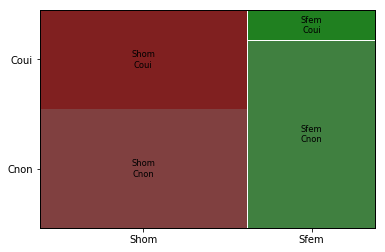

In [57]:
from statsmodels.graphics.mosaicplot import mosaic
visaprem["SEXEQ"]=visaprem["SEXEQ"].cat.remove_unused_categories()
table=pd.crosstab(visaprem["SEXEQ"],visaprem["CARVP"])
print(table)
mosaic(table.stack())
plt.show()

In [58]:
#Transformations des variables 
## regroupements de modalités
visatrans=visaprem
FAMIQ_DIC = {"Fmar":'Fcou',"Fuli":'Fcou',"Fdiv":'Fseu','Fveu':'Fseu',
                        "Fsep":'Fseu',"Fcel":'Fseu'}
PCSPQ_DIC = {"Pagr":"Pint",'Part':"Pint","Pret":"Psan","Pinc":"Psan"}
# attention de bien gétrer le type des variables
visatrans["PCSPQ"]=pd.Categorical(visatrans["PCSPQ"].astype(str).replace(PCSPQ_DIC),ordered=False)
visatrans["FAMIQ"]=visatrans["FAMIQ"].astype(str).replace(FAMIQ_DIC)

In [59]:
# complétion de valeurs
visatrans["ZOCNB"].fillna(0, inplace=True)
visatrans["ZOCNB"]
visatrans = visatrans[visatrans.DMVTP.notnull()]
# Correction ancienneté relation
visatrans["RELAT"]= [x-720 if x>600 else x for x in visatrans["RELAT"]]

In [104]:
# log des variables de distribution dissymétrique 
def log1(x):
    return np.log(1+x)
listeVarLog=['OPGNB','MOYRV','TAVEP','ENDET','GAGET','GAGEC',
'GAGEM','QCRED','DMVTP','BOPPN','FACAN','LGAGT',
'VIEMT','XLGMT','YLVMT','ITAVC','HAVEF','JNBJD']
visatrans[listeVarLog]=log1(visatrans[listeVarLog])
visatrans["ZOCNB"]=np.sqrt(visatrans["ZOCNB"])

## Analyse en composantes principales
Cette phase de l'analyse permet de mieux comprendre la structure de corrélation des variables afin de d'appréhender ce que seront les grandes classes de comportement des clients.

**Q** L'ACP calculée ci-dessous est-elle réduite ? Pourquoi?

In [61]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
# définition de la commande
pca = PCA()
# Sélection des variables quantitatives
dat=visatrans[["AGER","RELAT","KVUNB", "OPGNB", "MOYRV","TAVEP","ENDET","GAGET","GAGEC","GAGEM","QCRED","DMVTP","BOPPN","FACAN","LGAGT","VIEMT","XLGMT","YLVMT","ITAVC","HAVEF","JNBJD","ZOCNB"]]
# réduction
data = pd.DataFrame(scale(dat),columns=dat.columns)
# composantes principales
C = pca.fit(data).transform(data)
C

array([[ 5.06873118e+00, -2.31016682e+00,  6.30113500e-01, ...,
        -6.03325690e-02, -6.36509608e-01, -1.24131489e-01],
       [-5.21747478e-01, -1.22785668e+00, -1.08299786e+00, ...,
        -2.84657660e-02,  9.05460972e-02, -3.46792456e-01],
       [ 2.07283520e-02, -1.52436252e+00, -1.23442711e+00, ...,
        -4.34993047e-01, -6.94183035e-02, -8.14253088e-02],
       ...,
       [ 6.00957207e-01, -3.64870525e-01, -1.71769453e+00, ...,
         4.02432018e-01,  2.96986873e-01,  4.79729371e-02],
       [-8.63469157e-02, -5.91024721e-02, -1.25487668e+00, ...,
         3.44988227e-01,  1.97389657e-01,  5.45518048e-02],
       [-3.70307304e+00, -1.66443788e+00,  1.86680436e+00, ...,
         9.23047863e-02,  1.43246163e-03,  1.49614408e-01]])

### Choix de dimension

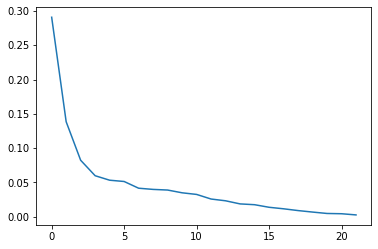

In [62]:
# Eboulis des valeurs propres
plt.figure()
plt.plot(pca.explained_variance_ratio_)
plt.show()

**Q** Que représente le graphe ci-dessous? Quelle information en tirer?

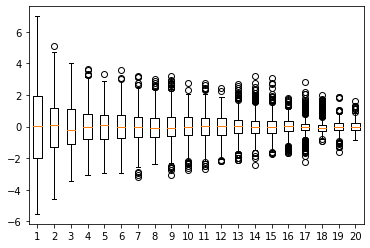

In [63]:
# Diagrammes boîte des composantes principales
plt.figure()
plt.boxplot(C[:,0:20])
plt.show()

### Représentation des individus

**Q** Quel est le graphe ci-dessous? Quelle information en retenir?

In [78]:
C[:,0]
C[:,1]
visatrans['CARVP']

MATRIC
148009     Coui
552427     Coui
556005     Coui
556686     Coui
642680     Coui
           ... 
7567726    Cnon
7572458    Cnon
7574479    Cnon
7580358    Cnon
7589439    Cnon
Name: CARVP, Length: 1063, dtype: category
Categories (2, object): [Cnon, Coui]

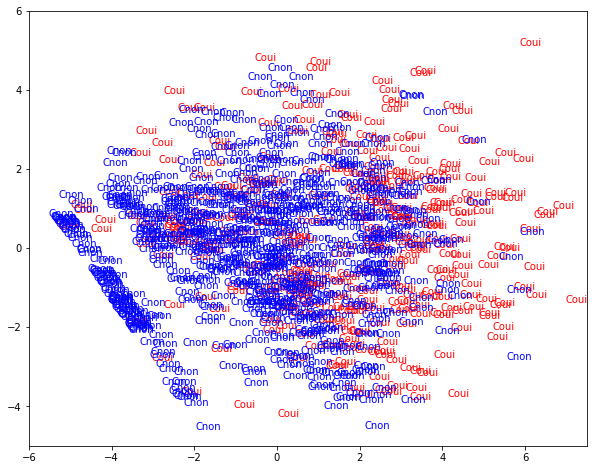

In [64]:
plt.figure(figsize=(10,8))
for i, j, nom in zip(C[:,0], C[:,1], visatrans['CARVP']):
    color = "red" if nom == "Coui" else "blue"
    plt.text(i, j, nom, color=color)
plt.axis((-6,7.5,-5,6))  
plt.show()

### Variables et cercle des corrélations
**Q** Que représent le graphe ci-dessous? Donner en une ligne une interprétation de l'axe 1 puis de l'axe2.

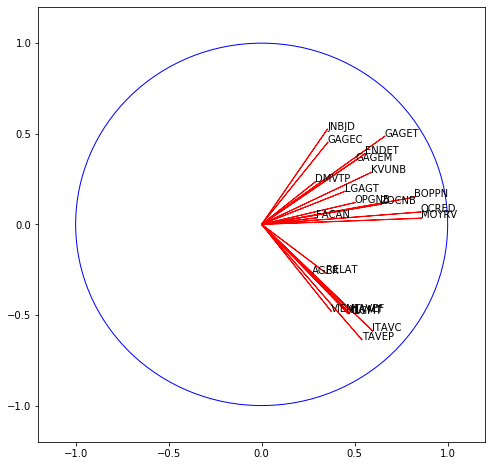

In [65]:
# coordonnées des variables
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, data.columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='r')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='b', fill=False)
ax.add_patch(c)
plt.show()

### Classification des variables
**QUESTION** Les classes de variables sont-elles cohérentes avec l'interprétataion des axes?

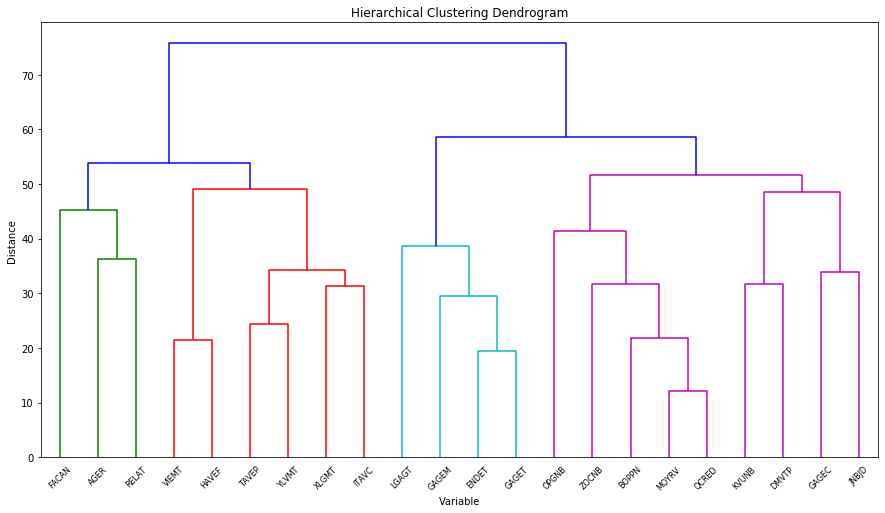

In [66]:
# Stratégie utilisée pour aider à l'interprétation du plan principal 
# lorsque le nombre de variables est important
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(data.T, 'ward')
plt.figure(figsize=(15, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Variable')
plt.ylabel('Distance')
dendrogram(Z,leaf_font_size=8.,labels=data.columns)
plt.show()

In [107]:
Z

(array([[ 4.13321078e+01,  1.25300245e+02,  0.00000000e+00,
         -8.94607843e-02,  5.77015168e-01,  2.09816159e+00,
          5.27202747e+00,  8.20485836e-01,  4.39632004e+00,
          1.99129749e+00,  2.33682209e+00,  9.93872549e-01,
          5.95865564e+03,  2.01237155e+00,  2.49122361e+00,
          2.58976317e+00,  2.58143241e+00,  1.48349340e+00,
          1.54411765e-01,  1.10952443e+00,  1.12009804e+00,
          1.14988113e+04,  4.74264706e-01,  2.58644613e+00,
          6.23774510e-01,  3.69011499e+00,  2.20588235e-02,
          2.00037990e+02,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  1.81821026e+00,
          1.00000000e+00,  1.51960784e-01,  8.45159385e+00,
          2.10391647e+00,  1.30601942e+00,  4.13321078e+01,
          1.25300245e+02,  5.95865564e+03,  5.77015168e-01,
          2.09816159e+00,  5.27202747e+00,  2.49122361e+00,
          2.58976317e+00,  8.45159385e+00],
        [ 4.85000000e+01,  1.56120690e+02,  0.00000000e+

## Segmentation ou *clustering* des clients
L'objectif principal, lors de cette première étude des données, est de fournir une typologie ou segmentation des clients. C'est-à-dire de définir des classes les plus homogènes au regard des comportements bancaires. Les algorithmes de classification étudiés sont adaptés à des variables {\em quantitatives} ou des matrices de distances. L'intégration d'informations qualitatives peut se faire par un recodage préalable (scoring) à l'aide d'une analyse des correspondances multiples. Ce scénatio se propose donc de comparer deux approches: classification à partir des seules variables quantitatives ou classification à partir des scores issues d'une afcm. D'autres approches sont envisageables sur des variables qualitatives qui nécessitent la définition d'une distance ou dissimilarité entre individus adaptée aux variables qualitatives. Mais, nécessitant la construction de la matrice *n x n* des distances des individus deux à deux, elles ne sont pas adaptées aux très grands tableaux.

### Sur les seules variables quantitatives

In [105]:
visapremv=visatrans
visapremw=visapremv[["AGER","RELAT","QSMOY","OPGNB","MOYRV","TAVEP","DMVTP","BOPPN","ITAVC"]]
fram=[visapremv,visapremw]
visapremvw=pd.concat(fram,1)

In [106]:
visapremv

,SEXEQ,AGER,FAMIQ,RELAT,PCSPQ,IMPNBS,REJETS,OPGNB,MOYRV,TAVEP,...,MTCATS,NBBECS,MTBECS,ZOCNB,NTCAS,NPTAG,ITAVC,HAVEF,CARVP,JNBJD
MATRIC,,,,,,,,,,,,,,,,,,,,,
148009,Shom,51,Fcou,238.0,Pcad,0.0,0.0,0.000000,1.749824,2.671497,...,0.0,0.0,0.0,1.934336,2.0,0.0,2.713417,2.655371,Coui,0.526589
552427,Shom,58,Fcou,139.0,Pcad,0.0,0.0,0.000000,1.550446,2.211830,...,0.0,0.0,0.0,0.000000,1.0,0.0,2.543008,0.000000,Coui,0.000000
556005,Shom,27,Fseu,99.0,Psan,0.0,0.0,0.000000,1.358505,2.504931,...,0.0,0.0,0.0,1.934336,2.0,0.0,2.511979,0.000000,Coui,0.000000
556686,Shom,49,Fseu,89.0,Pemp,0.0,0.0,0.000000,1.935416,2.643874,...,0.0,0.0,0.0,1.821160,3.0,1.0,2.647015,2.395371,Coui,1.327761
642680,Shom,64,Fcou,216.0,Pcad,0.0,0.0,1.026672,1.439569,2.507188,...,0.0,0.0,0.0,2.279507,1.0,0.0,2.509998,0.000000,Coui,0.869742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7567726,Sfem,38,Fcou,23.0,Psan,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,Cnon,0.000000
7572458,Sfem,43,Fcou,27.0,Pcad,0.0,0.0,0.000000,0.000000,2.329878,...,0.0,0.0,0.0,0.000000,0.0,0.0,2.329878,0.000000,Cnon,0.000000
7574479,Sfem,49,Fcou,31.0,Pemp,0.0,0.0,0.959135,1.310506,2.479086,...,0.0,0.0,0.0,1.732051,1.0,0.0,2.489581,0.000000,Cnon,1.194706


In [99]:
visapremw

,AGER,RELAT,QSMOY,OPGNB,MOYRV,TAVEP,DMVTP,BOPPN,ITAVC
MATRIC,,,,,,,,,
148009,51,238.0,35938.0,0.000000,4.753590,13.461603,2.484907,3.912023,14.080718
552427,58,139.0,1336.0,0.000000,3.713572,8.132413,2.708050,1.098612,11.717872
556005,27,99.0,12221.0,0.000000,2.890372,11.242717,2.484907,3.178054,11.329303
556686,49,89.0,21187.0,0.000000,5.926926,13.067592,2.484907,3.912023,13.111856
642680,64,216.0,7154.0,1.791759,3.218876,11.270382,2.484907,4.219508,11.304904
...,...,...,...,...,...,...,...,...,...
7567726,38,23.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7572458,43,27.0,0.0,0.000000,0.000000,9.276690,0.000000,0.000000,9.276690
7574479,49,31.0,2711.0,1.609438,2.708050,10.930353,2.639057,3.951244,11.056225


In [91]:
visapremvw

,SEXEQ,AGER,FAMIQ,RELAT,PCSPQ,IMPNBS,REJETS,OPGNB,MOYRV,TAVEP,...,JNBJD,AGER,RELAT,QSMOY,OPGNB,MOYRV,TAVEP,DMVTP,BOPPN,ITAVC
MATRIC,,,,,,,,,,,,,,,,,,,,,
148009,Shom,51,Fcou,238.0,Pcad,0.0,0.0,0.000000,4.753590,13.461603,...,0.693147,51,238.0,35938.0,0.000000,4.753590,13.461603,2.484907,3.912023,14.080718
552427,Shom,58,Fcou,139.0,Pcad,0.0,0.0,0.000000,3.713572,8.132413,...,0.000000,58,139.0,1336.0,0.000000,3.713572,8.132413,2.708050,1.098612,11.717872
556005,Shom,27,Fseu,99.0,Psan,0.0,0.0,0.000000,2.890372,11.242717,...,0.000000,27,99.0,12221.0,0.000000,2.890372,11.242717,2.484907,3.178054,11.329303
556686,Shom,49,Fseu,89.0,Pemp,0.0,0.0,0.000000,5.926926,13.067592,...,2.772589,49,89.0,21187.0,0.000000,5.926926,13.067592,2.484907,3.912023,13.111856
642680,Shom,64,Fcou,216.0,Pcad,0.0,0.0,1.791759,3.218876,11.270382,...,1.386294,64,216.0,7154.0,1.791759,3.218876,11.270382,2.484907,4.219508,11.304904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7567726,Sfem,38,Fcou,23.0,Psan,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,38,23.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7572458,Sfem,43,Fcou,27.0,Pcad,0.0,0.0,0.000000,0.000000,9.276690,...,0.000000,43,27.0,0.0,0.000000,0.000000,9.276690,0.000000,0.000000,9.276690
7574479,Sfem,49,Fcou,31.0,Pemp,0.0,0.0,1.609438,2.708050,10.930353,...,2.302585,49,31.0,2711.0,1.609438,2.708050,10.930353,2.639057,3.951244,11.056225


In [101]:
# Sélection des variables quantitatives
visaprems=visapremvw.select_dtypes(include=["int32","float","int64"])
# Centrage et réduction
#visaprems = scale(visaprems)
#visaprems
visaprems

,AGER,RELAT,IMPNBS,REJETS,OPGNB,MOYRV,TAVEP,ENDET,GAGET,GAGEC,...,JNBJD,AGER,RELAT,QSMOY,OPGNB,MOYRV,TAVEP,DMVTP,BOPPN,ITAVC
MATRIC,,,,,,,,,,,,,,,,,,,,,
148009,51,238.0,0.0,0.0,0.000000,4.753590,13.461603,1.609438,11.688701,0.00000,...,0.693147,51,238.0,35938.0,0.000000,4.753590,13.461603,2.484907,3.912023,14.080718
552427,58,139.0,0.0,0.0,0.000000,3.713572,8.132413,0.000000,0.000000,0.00000,...,0.000000,58,139.0,1336.0,0.000000,3.713572,8.132413,2.708050,1.098612,11.717872
556005,27,99.0,0.0,0.0,0.000000,2.890372,11.242717,0.000000,0.000000,0.00000,...,0.000000,27,99.0,12221.0,0.000000,2.890372,11.242717,2.484907,3.178054,11.329303
556686,49,89.0,0.0,0.0,0.000000,5.926926,13.067592,0.000000,12.250391,10.54165,...,2.772589,49,89.0,21187.0,0.000000,5.926926,13.067592,2.484907,3.912023,13.111856
642680,64,216.0,0.0,0.0,1.791759,3.218876,11.270382,0.000000,0.000000,0.00000,...,1.386294,64,216.0,7154.0,1.791759,3.218876,11.270382,2.484907,4.219508,11.304904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7567726,38,23.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,38,23.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7572458,43,27.0,0.0,0.0,0.000000,0.000000,9.276690,0.000000,0.000000,0.00000,...,0.000000,43,27.0,0.0,0.000000,0.000000,9.276690,0.000000,0.000000,9.276690
7574479,49,31.0,0.0,0.0,1.609438,2.708050,10.930353,0.000000,0.000000,0.00000,...,2.302585,49,31.0,2711.0,1.609438,2.708050,10.930353,2.639057,3.951244,11.056225


In [69]:
# Classification d'un grand tableau par k-means puis CAH
## k-means avec 100 classes
from sklearn.cluster import *
T=k_means(visaprems,100)
poids=np.zeros((100,))
for i in T[1]:
    poids[i]=1./np.size(T[1])
np.sum(poids)

0.09407337723424271

In [70]:
## CAH des barycentres des classes
## Calcul de la matrices des distances pondérées
def weightedL2(a,b,wa,wb):
    q = wa*a-wb*b
    return np.sqrt((q*q).sum())
dist=np.zeros((100,100))
for i in range(dist.shape[0]):
    for j in range(dist.shape[1]):
        dist[i,j]=weightedL2(T[0][i],T[0][j],poids[i],poids[j])
from scipy.cluster.hierarchy import *
Q= linkage(dist, 'ward')        
        

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  # This is added back by InteractiveShellApp.init_path()


In [96]:
dist.shape

(100, 100)

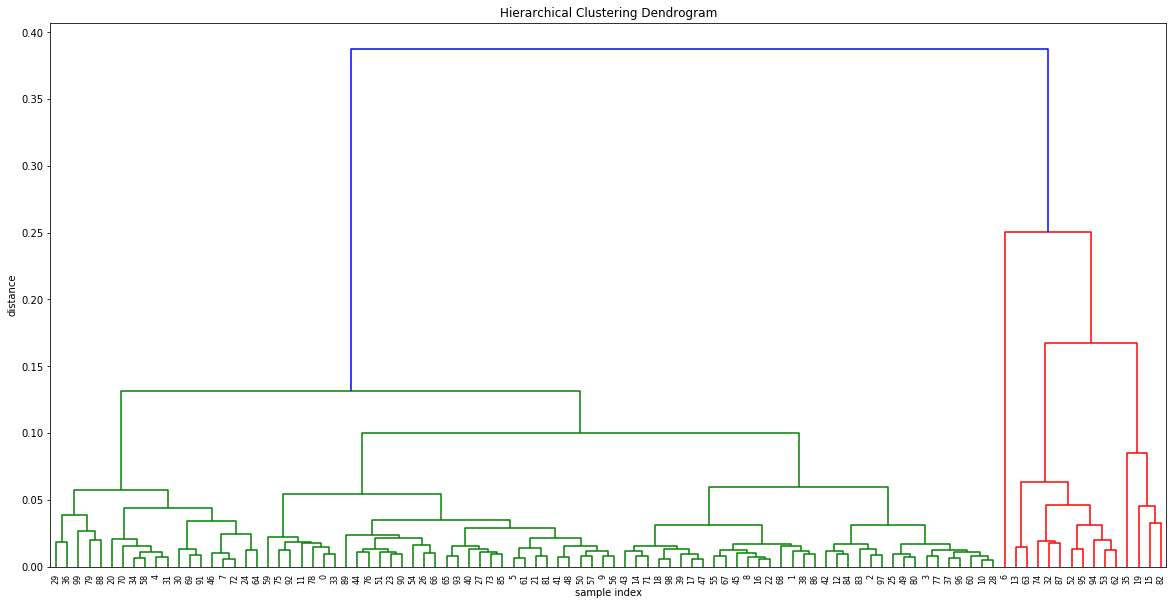

In [71]:
## Dendrogramme des barycentres des classes
plt.figure(figsize=(20, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Q,leaf_font_size=8.)
plt.show()

**QUESTION** Interpréter le graphique ci dessus

### Choix du nombre de classes

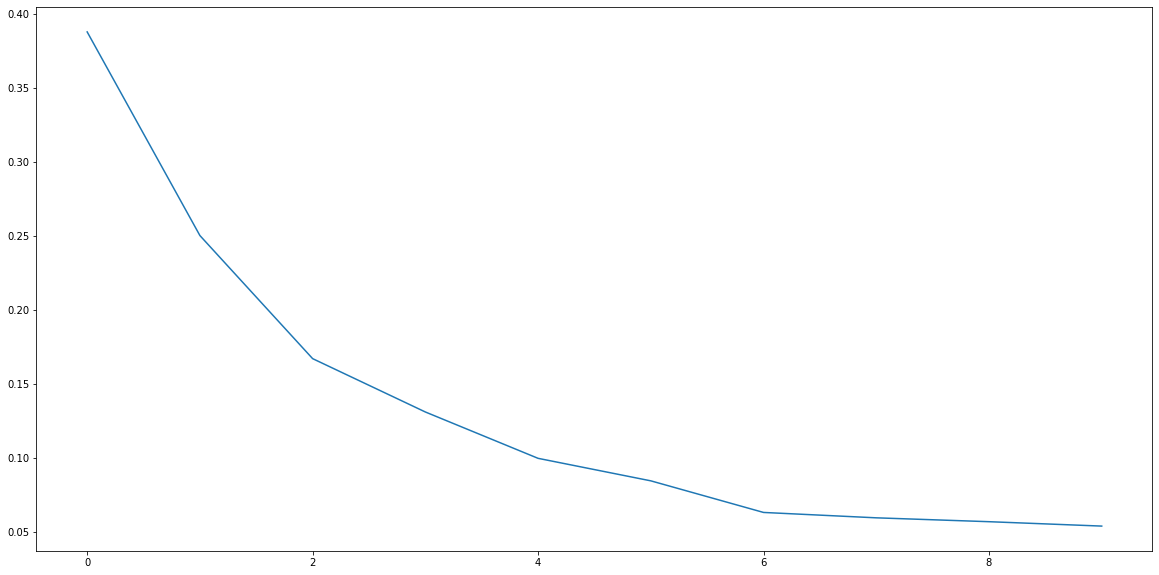

In [72]:
plt.figure(figsize=(20, 10))
plt.plot(maxdists(Q)[::-1][0:10])
plt.show()

In [73]:
pd.DataFrame(Z[1],columns=["Classe"])

,Classe
0,6.000000
1,7.000000
2,19.467012
3,2.000000


In [103]:
## k-means avec le nombre choisi de classes 
Z=k_means(visaprems,5)
pca=PCA()
C = pca.fit(visaprems).transform(visaprems)


1063

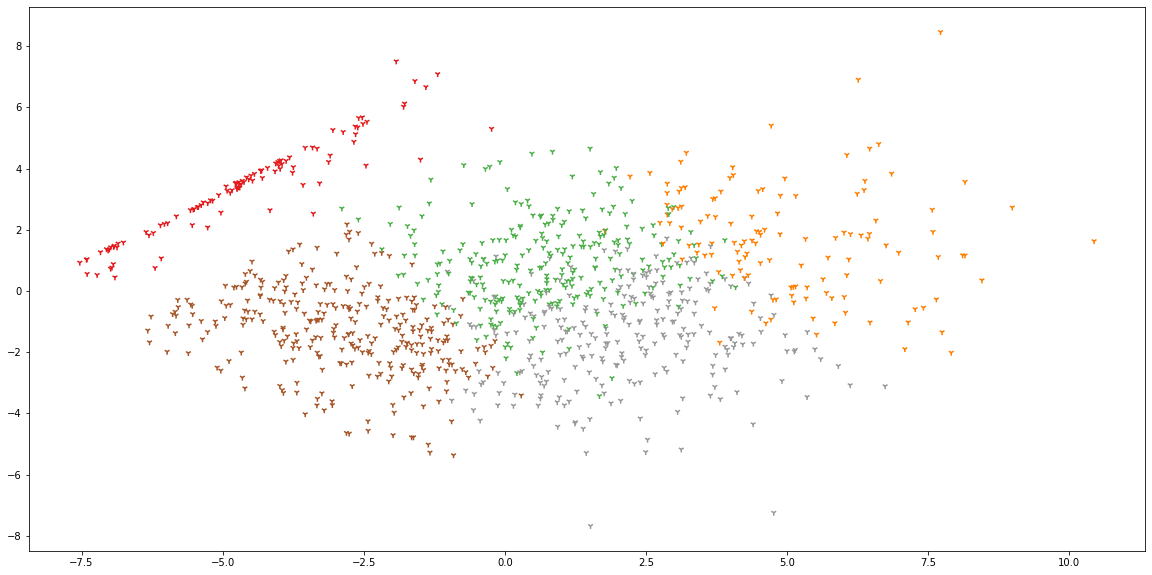

In [75]:
## représentation des classes dans l'ACP
plt.figure(figsize=(20, 10))
plt.scatter(C[:,0], C[:,1],marker='1',c=Z[1],cmap=plt.cm.Set1)
plt.show()

**QUESTION** Interpréter les profils clients